# The Objective

### The objective of the credit card fraud detection project is to develop a robust and accurate system that can identify and flag potentially fraudulent transactions in real-time. By leveraging machine learning algorithms and historical transaction data, the goal is to minimize financial losses for both customers and credit card companies while maintaining a low false positive rate to avoid inconveniencing legitimate customers. The project aims to enhance the overall security and trustworthiness of credit card transactions by proactively detecting and preventing fraudulent activities.

# Data Description

### . The data set I am going to use contains data about credit card transactions that occurred during a period of two days, with 492 frauds out of 284,807 transactions.

### . All variables in the dataset are numerical. The data has been transformed using PCA transformations due to privacy reasons.

### . The two features that haven’t been changed are Time and Amount. Time contains the seconds elapsed between each transaction and the first transaction in the dataset. 

# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Importing the Dataset

In [2]:
# Let's import the dataset for the project

Credit_data = pd.read_csv('C:\\Users\\LENOVO USER\\Downloads\\creditcard.csv')

# Check Top Five Rows of the Dataset

In [3]:
pd.set_option("Display.max_columns", None)

In [4]:
Credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Check Last Five Rows of The Dataset

In [5]:
Credit_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


# Get Information About Our Dataset

In [6]:
Credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Find The Shape of Our Dataset (Number of Rows and Columns)

In [7]:
# Let's check the shape of our dataset

Credit_data.shape

(284807, 31)

In [8]:
print('Numbers of Rows', Credit_data.shape[0])
print('Numbers of Columns', Credit_data.shape[1])

Numbers of Rows 284807
Numbers of Columns 31


# Check The Null Values in Our Dataset

In [9]:
Credit_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Checking For Duplicates

In [10]:
# Let's check if there is any duplicate in our data

print(Credit_data.duplicated())

0         False
1         False
2         False
3         False
4         False
          ...  
284802    False
284803    False
284804    False
284805    False
284806    False
Length: 284807, dtype: bool


In [11]:
# Let's check the distribution of legist and fraudulent transaction

Credit_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

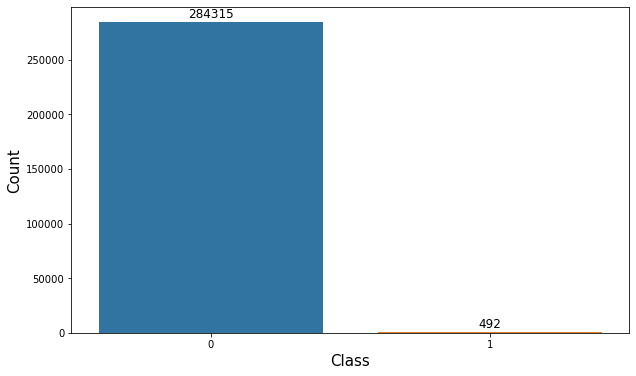

In [12]:
# Let's visualize the distribution of legist and fraudulent transaction

plt.figure(figsize=(10,6))
plots = sns.countplot(x = 'Class', data=Credit_data)
plt.xlabel('Class', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()), (bar.get_x() + bar.get_width() / 2,bar.get_height()),
                   ha='center', va='center', size=12, xytext=(0,8),textcoords='offset points')

### This dataset is highly imbalanced

### . 0------------> Legit Transaction.

### . 1-------------> Fraudulent Transaction.

In [13]:
# Let's separate the legit and fraudulent transaction

Legit = Credit_data[Credit_data.Class==0]
Fraud = Credit_data[Credit_data.Class==1]

In [14]:
# Let's check the shape of the legit and fraud transaction

print(Legit.shape)
print(Fraud.shape)

(284315, 31)
(492, 31)


# Checking The Amount of Money involved in each kind of transaction

In [15]:
# Let's get the statistics about the legit transaction

Legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

### The average amount of the legit transaction is 88 dollars and the maximum amount is 25,691 dollars.

In [16]:
# Let's get the statistics about the Fraud transaction

Fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

### The average amount of the fraud transaction is 122 dollars and the maximum amount is 2125 dollars.

In [17]:
# Let's get the mean values of both transactions

Credit_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# Under-sampling

### A similar sample dataset of the distributions of both the legit and fraudulent will be built.

In [18]:
Legit_sample = Legit.sample(n=492)

### The Number of Fraudualent Transaction is 492

# Concatenating Two Dataframes

In [19]:
Credit_card_data = pd.concat([Legit_sample, Fraud], axis = 0)

In [20]:
# Let's view the first five rows of our new data

Credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
38904,39611.0,0.975206,-0.876113,0.869032,0.161701,-1.221447,0.131818,-0.714011,0.276902,1.177581,-0.291463,0.362477,0.379706,-1.501562,-0.061015,-0.804137,0.255397,-0.138090,0.166144,0.853129,0.077004,-0.153113,-0.539756,-0.053116,0.055580,0.059423,0.938066,-0.068642,0.017171,120.00,0
106629,70046.0,1.007044,-1.226431,1.160148,-0.304923,-1.695748,-0.054499,-0.946277,0.081421,-0.329523,0.449690,1.272013,1.134479,1.099855,-0.901903,-1.503540,0.840305,0.454363,-1.226073,1.073000,0.418293,0.167606,0.352520,-0.121124,0.603797,0.311745,-0.293303,0.030876,0.044585,153.50,0
153646,99739.0,-2.714161,1.853146,-0.258851,0.035999,-1.522433,-0.568975,-1.268741,1.718788,1.847798,-0.988408,-0.676063,-1.734074,1.974331,2.210698,-0.422913,0.203475,1.036114,0.748206,-0.276633,-0.090031,0.201688,0.860372,-0.222330,-0.025292,-0.053362,-0.123696,0.325640,0.059051,32.34,0
110898,72019.0,-1.788876,-1.859378,2.026742,-0.226888,0.067665,-0.970044,-0.555985,0.262382,1.161360,-1.354420,-0.082602,0.463325,-0.329045,0.012771,1.948761,-1.291600,0.657302,0.124245,1.166177,0.857305,0.399002,0.603280,0.637847,0.384952,-0.139771,-0.568477,0.111293,0.190594,199.10,0
129155,78973.0,-0.753297,1.275073,0.497858,0.673555,0.555556,0.081428,0.407072,0.432874,-0.834366,-0.328314,-0.984451,0.499806,1.427160,0.373006,1.166814,-0.314310,-0.115597,-0.174678,0.339204,0.166209,0.157560,0.523466,-0.169842,-0.720325,-0.087086,-0.239192,0.314237,0.131247,19.08,0


In [21]:
# Let's view the last five rows of our new data

Credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,-0.888722,0.491140,0.728903,0.380428,-1.948883,-0.832498,0.519436,0.903562,1.197315,0.593509,-0.017652,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [22]:
# Let's the distribution of our new data

Credit_card_data['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

### Our data points are uniformly balanced now.

In [23]:
# Let's get the mean values of both transactions

Credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,93255.016260,-0.074685,0.057391,0.074111,-0.036922,0.001833,0.060402,-0.014874,-0.070823,0.005005,-0.013774,-0.071027,0.022715,-0.030772,-0.021281,0.023139,0.038988,-0.000216,0.007925,-0.020505,0.012705,0.007346,-0.012191,0.009462,-0.014437,-0.002765,0.082464,0.007358,-0.018938,85.749187
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


### We can see the average amount of both legit and fraudualent are 94 and 122 dollars respectively.

# Store Feature Variables in X and Target in Vector Y

In [24]:
X = Credit_card_data.drop('Class', axis = 1)
Y = Credit_card_data['Class']

In [25]:
# Let's view the X values

print(X)

            Time        V1        V2        V3        V4        V5        V6  \
38904    39611.0  0.975206 -0.876113  0.869032  0.161701 -1.221447  0.131818   
106629   70046.0  1.007044 -1.226431  1.160148 -0.304923 -1.695748 -0.054499   
153646   99739.0 -2.714161  1.853146 -0.258851  0.035999 -1.522433 -0.568975   
110898   72019.0 -1.788876 -1.859378  2.026742 -0.226888  0.067665 -0.970044   
129155   78973.0 -0.753297  1.275073  0.497858  0.673555  0.555556  0.081428   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9   

In [26]:
# Let's view the X values

print(Y)

38904     0
106629    0
153646    0
110898    0
129155    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


# Splitting The Dataset into Training and Test data

In [27]:
# Let's split the data into training and test train

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [28]:
# let's check the shapes of x_train and x_test

print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


# Feature Scaling

In [29]:
Scaler = StandardScaler()

In [30]:
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

# Model Training--------> Logistic Regression

In [31]:
Lr = LogisticRegression()
Lr.fit(X_train, Y_train)
y_pred1 = Lr.predict(X_test)
print(accuracy_score(Y_test, y_pred1))

0.9441624365482234


### This is a good accuracy score which means out of 100 predictions our model can predict correctly for 93 values.

# Save The Model

In [32]:
# Let's save our model on entire dataset

Lr = LogisticRegression()
Lr = Lr.fit(X, Y)

In [33]:
# Let's import joblib library

import joblib

In [34]:
joblib.dump(Lr, 'Credit Card Fraud Detector')

['Credit Card Fraud Detector']

### Our model has been saved with Credit Card Fraud Predictor which means it will be used for future prediction.

# Let's Load The Saved Model

In [35]:
Model = joblib.load('Credit Card Fraud Detector')

# Prediction on New Data

In [36]:
# Let's view our dataset

Credit_card_data.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
38904,39611.0,0.975206,-0.876113,0.869032,0.161701,-1.221447,0.131818,-0.714011,0.276902,1.177581,-0.291463,0.362477,0.379706,-1.501562,-0.061015,-0.804137,0.255397,-0.138090,0.166144,0.853129,0.077004,-0.153113,-0.539756,-0.053116,0.055580,0.059423,0.938066,-0.068642,0.017171,120.0,0
106629,70046.0,1.007044,-1.226431,1.160148,-0.304923,-1.695748,-0.054499,-0.946277,0.081421,-0.329523,0.449690,1.272013,1.134479,1.099855,-0.901903,-1.503540,0.840305,0.454363,-1.226073,1.073000,0.418293,0.167606,0.352520,-0.121124,0.603797,0.311745,-0.293303,0.030876,0.044585,153.5,0


In [37]:
Credit_card_data.tail(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.93352,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,-0.888722,0.49114,0.728903,0.380428,-1.948883,-0.832498,0.519436,0.903562,1.197315,0.593509,-0.017652,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [38]:
# Let's create a new dataset

import pandas as pd
New_data = pd.DataFrame({
    'Time' :81201.0,
    'V1' :-4.748467,
    'V2' :0.296753,
    'V3' :6.998844,
    'V4' :2.896531,
    'V5' :1.780432,
    'V6' :-3.564544,
    'V7' :2.756437,
    'V8' :1.790032,
    'V9' :1.672288,
    'V10':2.703476,
    'V11':3.223050,
    'V12':0.473509,
    'V13':2.158476,
    'V14':0.007755,
    'V15':3.188476,
    'V16':3.680384,
    'V17':0.587986,
    'V18':1.380456,
    'V19':0.867390,
    'V20':2.087582,
    'V21':1.491147,
    'V22':-3.778643,
    'V23':2.013467,
    'V24':3.954652,
    'V25':2.856273,
    'V26':2.426543,
    'V27':1.323244,
    'V28':2.723176,
    'Amount':300.0
}, index=[0])

In [39]:
# Let's view our New data

New_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,81201.0,-4.748467,0.296753,6.998844,2.896531,1.780432,-3.564544,2.756437,1.790032,1.672288,2.703476,3.22305,0.473509,2.158476,0.007755,3.188476,3.680384,0.587986,1.380456,0.86739,2.087582,1.491147,-3.778643,2.013467,3.954652,2.856273,2.426543,1.323244,2.723176,300.0


In [40]:
# Let's make a prediction using the new data

Model.predict(New_data)

array([0], dtype=int64)

### Our model predicted 0 for the New data that was inputed. This critically states that the transaction is Legit.